<a href="https://colab.research.google.com/github/inseungkang/learningalgos/blob/main/Controller_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drivedrive.mount('/content/drive', force_remount=True)

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Inseung_LearningAlgos/
!pip3 install c3d

import numpy as np
import pandas as pd
import os
import fnmatch
import c3d
import matplotlib.pyplot as plt

Mounted at /content/drive
/content/drive/My Drive/Inseung_LearningAlgos


In [41]:
# This is mainly for the tied-belt trials
# Extract maker header location from each c3d files

file_dir = '/content/drive/My Drive/Inseung_LearningAlgos/c3d files/'
file_list = os.listdir('/content/drive/My Drive/Inseung_LearningAlgos/c3d files/')
file_list.sort()
header_col_list = []
for filename in file_list:
  reader = c3d.Reader(open(file_dir+filename, 'rb'))
  markerLabel = reader.point_labels
  markerName = ['RASI','LASI','RPSI','LPSI','RANL','LANL']
  header_list = []
  for _, name in enumerate(markerName):
    for idx, label in enumerate(markerLabel):
      if name == label.strip():
        header_list.append(idx)
        # /(idx)
  header_col_list.append(header_list)

# file_list = [i for i in file_list if 'Session1_R' in i]


AB1_Session1_Right10_Left10.c3d
AB1_Session1_Right12_Left12.c3d
AB1_Session1_Right14_Left14.c3d
AB1_Session1_Right6_Left6.c3d
AB1_Session1_Right8_Left8.c3d
AB2_Session1_Right10_Left10.c3d
AB2_Session1_Right12_Left12.c3d
AB2_Session1_Right14_Left14.c3d
AB2_Session1_Right6_Left6.c3d
AB2_Session1_Right8_Left8.c3d
AB3_Session1_RIght10_Left10.c3d
AB3_Session1_Right12_Left12.c3d
AB3_Session1_Right14_Left14.c3d
AB3_Session1_Right6_Left6.c3d
AB3_Session1_Right8_Left8.c3d
AB4_Session1_Right10_Left10.c3d
AB4_Session1_Right12_Left12.c3d
AB4_Session1_Right14_Left14.c3d
AB4_Session1_Right6_Left6.c3d
AB4_Session1_Right8_Left8.c3d
AB5_Session1_Right10_Left10.c3d
AB5_Session1_Right12_Left12.c3d
AB5_Session1_Right14_Left14.c3d
AB5_Session1_Right6_Left6.c3d
AB5_Session1_Right8_Left8.c3d


In [43]:
# from npz files, open the file and truncate data to sync the data so we can extract 6 min of walking data (using the sync force plate)
# main trial started after the rising edge of the synce force plate
npz_dir = '/content/drive/My Drive/Inseung_LearningAlgos/npz files/'
test_file_name = 'AB1_Session1_Right10_Left10.npz'
test_file_header = header_col_list[0]

with np.load(npz_dir+test_file_name) as data:
  marker_data = data['points']
  force_data = data['analog']

force_sync = np.mean(force_data[:,14,:], axis=1)
start_idx = np.argwhere(abs(force_sync) > np.max(abs(force_sync)/2))[0,0]
end_idx = start_idx + 6*6000        #6 min of walking

foot_r = marker_data[start_idx:end_idx, test_file_header[4], 0:3]
foot_l = marker_data[start_idx:end_idx, test_file_header[5], 0:3]
com = np.mean(marker_data[start_idx:end_idx, test_file_header[0:4], 0:3], axis=1)
force_r = np.mean(force_data[start_idx:end_idx, 0:3, :], axis=2)
force_l = np.mean(force_data[start_idx:end_idx, 6:9, :], axis=2)

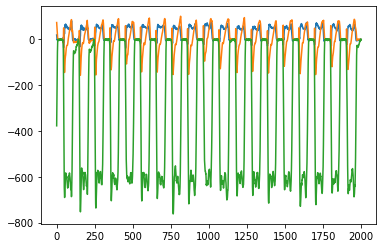

In [46]:
TreadmillSpeed = 1
frac_distance_from_midstance_list = 0

# Compute gait event index number (left and right). This will be in the order of left mid stance, right heel contact, right mid stance, and left heel contact
# This will be used to compute the com state during mid stance and evaluate the foot placement in the following heel contact







